<a href="https://colab.research.google.com/github/LuziaAm/Python-Pandas/blob/main/Projeto_AnaliseDados_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
import pandas as pd

In [207]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")

In [208]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,1/5/2019,13:08,Ewallet,522.83,4.76,26.14,9.10
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,3/8/2019,10:29,Cash,76.40,4.76,3.82,9.60
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,3/3/2019,13:23,Credit card,324.31,4.76,16.22,7.40
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,1/27/2019,20:33,Ewallet,465.76,4.76,23.29,8.40
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2/8/2019,10:37,Ewallet,604.17,4.76,30.21,5.30


In [209]:
#Renomeando as Colunas
df = df.rename(columns={"Invoice ID":"ID Fatura","Branch":"Fatura","City":"Cidade","Customer type":"Tipo Cliente","Gender":"Gênero","Product line":"Linha Produto","Unit price":"Preço Unit","Quantity":"Quantidade","Date":"Data","Time":"Tempo","Payment":"Forma_Pagamento","gross margin percentage":"Porcentagem Margem Bruta","gross income":"Renda Bruta","Rating":"Avaliação"})

In [210]:
df.sample()

,ID Fatura,Fatura,Cidade,Tipo Cliente,Gênero,Linha Produto,Preço Unit,Quantidade,Tax 5%,Total,Data,Tempo,Forma_Pagamento,cogs,Porcentagem Margem Bruta,Renda Bruta,Avaliação
497,862-59-8517,C,Naypyitaw,Normal,Female,Food and beverages,90.24,6,27.07,568.51,1/27/2019,11:17,Cash,541.44,4.76,27.07,6.20


In [211]:
df.shape

(1000, 17)

In [212]:
df.columns

Index(['ID Fatura', 'Fatura', 'Cidade', 'Tipo Cliente', 'Gênero',
       'Linha Produto', 'Preço Unit', 'Quantidade', 'Tax 5%', 'Total', 'Data',
       'Tempo', 'Forma_Pagamento', 'cogs', 'Porcentagem Margem Bruta',
       'Renda Bruta', 'Avaliação'],
      dtype='object')

In [213]:
df.dtypes

ID Fatura                    object
Fatura                       object
Cidade                       object
Tipo Cliente                 object
Gênero                       object
Linha Produto                object
Preço Unit                  float64
Quantidade                    int64
Tax 5%                      float64
Total                       float64
Data                         object
Tempo                        object
Forma_Pagamento              object
cogs                        float64
Porcentagem Margem Bruta    float64
Renda Bruta                 float64
Avaliação                   float64
dtype: object

In [214]:
df.describe()

,Preço Unit,Quantidade,Tax 5%,Total,cogs,Porcentagem Margem Bruta,Renda Bruta,Avaliação
count,"1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00"
mean,55.67,5.51,15.38,322.97,307.59,4.76,15.38,6.97
std,26.49,2.92,11.71,245.89,234.18,0.00,11.71,1.72
min,10.08,1.00,0.51,10.68,10.17,4.76,0.51,4.00
25%,32.88,3.00,5.92,124.42,118.50,4.76,5.92,5.50
50%,55.23,5.00,12.09,253.85,241.76,4.76,12.09,7.00
75%,77.94,8.00,22.45,471.35,448.91,4.76,22.45,8.50
max,99.96,10.00,49.65,"1,042.65",993.00,4.76,49.65,10.00


In [215]:
df["Cidade"].unique()#Valores Unicos de Cidades

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [216]:
Yangon = df.loc[df["Cidade"] == "Yangon"] #Filtro da Cidade
Yangon.sample(5)

,ID Fatura,Fatura,Cidade,Tipo Cliente,Gênero,Linha Produto,Preço Unit,Quantidade,Tax 5%,Total,Data,Tempo,Forma_Pagamento,cogs,Porcentagem Margem Bruta,Renda Bruta,Avaliação
732,756-49-0168,A,Yangon,Member,Male,Fashion accessories,19.70,1,0.98,20.68,2/8/2019,11:39,Ewallet,19.70,4.76,0.98,9.50
74,287-21-9091,A,Yangon,Normal,Male,Home and lifestyle,74.67,9,33.60,705.63,1/22/2019,10:55,Ewallet,672.03,4.76,33.60,9.40
57,635-40-6220,A,Yangon,Normal,Male,Health and beauty,89.60,8,35.84,752.64,2/7/2019,11:28,Ewallet,716.80,4.76,35.84,6.60
269,731-14-2199,A,Yangon,Member,Female,Home and lifestyle,35.54,10,17.77,373.17,1/4/2019,13:34,Ewallet,355.40,4.76,17.77,7.00
392,563-36-9814,A,Yangon,Member,Male,Electronic accessories,76.82,1,3.84,80.66,2/13/2019,18:27,Ewallet,76.82,4.76,3.84,7.20


In [217]:
#Transformando tipo das colunas Data e Tempo
df['Data'] = pd.to_datetime(df['Data'])
df['Tempo'] = pd.to_datetime(df['Tempo'])

In [218]:
df.dtypes

ID Fatura                           object
Fatura                              object
Cidade                              object
Tipo Cliente                        object
Gênero                              object
Linha Produto                       object
Preço Unit                         float64
Quantidade                           int64
Tax 5%                             float64
Total                              float64
Data                        datetime64[ns]
Tempo                       datetime64[ns]
Forma_Pagamento                     object
cogs                               float64
Porcentagem Margem Bruta           float64
Renda Bruta                        float64
Avaliação                          float64
dtype: object

In [219]:
pd.options.display.float_format = '{:20,.2f}'.format

In [220]:
#Média de gastos por tipo de cliente
df.groupby("Tipo Cliente")["Total"].mean() 

Tipo Cliente
Member                 327.79
Normal                 318.12
Name: Total, dtype: float64

In [221]:
df.isnull().sum()

ID Fatura                   0
Fatura                      0
Cidade                      0
Tipo Cliente                0
Gênero                      0
Linha Produto               0
Preço Unit                  0
Quantidade                  0
Tax 5%                      0
Total                       0
Data                        0
Tempo                       0
Forma_Pagamento             0
cogs                        0
Porcentagem Margem Bruta    0
Renda Bruta                 0
Avaliação                   0
dtype: int64

In [222]:
df["Tax 5%"].max() #Taxa Máxima

49.65

In [223]:
df["Tax 5%"].min() #Taxa Máxima

0.5085

In [224]:
#Resutado da soma do Total - Soma do COGS = Total de taxas
(df["Total"].sum())-(df["cogs"].sum()) 

15379.368999999948

In [225]:
#Soma de todas as taxas
df["Tax 5%"].sum()

15379.368999999999

In [226]:
#Top 10 maiores vendas
df.nlargest(10, "Total")

,ID Fatura,Fatura,Cidade,Tipo Cliente,Gênero,Linha Produto,Preço Unit,Quantidade,Tax 5%,Total,Data,Tempo,Forma_Pagamento,cogs,Porcentagem Margem Bruta,Renda Bruta,Avaliação
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.65,"1,042.65",2019-02-15,2021-08-27 14:53:00,Credit card,993.00,4.76,49.65,6.60
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.49,"1,039.29",2019-02-08,2021-08-27 16:20:00,Credit card,989.80,4.76,49.49,8.70
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.26,"1,034.46",2019-01-30,2021-08-27 20:23:00,Ewallet,985.20,4.76,49.26,4.50
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.75,"1,023.75",2019-01-12,2021-08-27 16:18:00,Ewallet,975.00,4.76,48.75,8.00
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.69,"1,022.49",2019-03-02,2021-08-27 17:16:00,Ewallet,973.80,4.76,48.69,4.40
792,744-16-7898,B,Mandalay,Normal,Female,Home and lifestyle,97.37,10,48.69,"1,022.38",2019-01-15,2021-08-27 13:48:00,Credit card,973.70,4.76,48.69,4.90
422,271-88-8734,C,Naypyitaw,Member,Female,Fashion accessories,97.21,10,48.60,"1,020.71",2019-02-08,2021-08-27 13:00:00,Credit card,972.10,4.76,48.60,8.70
166,234-65-2137,C,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,47.79,"1,003.59",2019-01-16,2021-08-27 13:32:00,Cash,955.80,4.76,47.79,4.80
357,554-42-2417,C,Naypyitaw,Normal,Female,Sports and travel,95.44,10,47.72,"1,002.12",2019-01-09,2021-08-27 13:45:00,Cash,954.40,4.76,47.72,5.20
429,325-77-6186,A,Yangon,Member,Female,Home and lifestyle,90.65,10,45.33,951.83,2019-03-08,2021-08-27 10:53:00,Ewallet,906.50,4.76,45.33,7.30


In [227]:
#Top 10 menores vendas
df.nsmallest(10, "Total")

,ID Fatura,Fatura,Cidade,Tipo Cliente,Gênero,Linha Produto,Preço Unit,Quantidade,Tax 5%,Total,Data,Tempo,Forma_Pagamento,cogs,Porcentagem Margem Bruta,Renda Bruta,Avaliação
822,784-21-9238,C,Naypyitaw,Member,Male,Sports and travel,10.17,1,0.51,10.68,2019-02-07,2021-08-27 14:15:00,Cash,10.17,4.76,0.51,5.90
629,308-39-1707,A,Yangon,Normal,Female,Fashion accessories,12.09,1,0.60,12.69,2019-01-26,2021-08-27 18:19:00,Credit card,12.09,4.76,0.60,8.20
223,279-62-1445,C,Naypyitaw,Member,Female,Fashion accessories,12.54,1,0.63,13.17,2019-02-21,2021-08-27 12:38:00,Cash,12.54,4.76,0.63,8.20
443,192-98-7397,C,Naypyitaw,Normal,Male,Fashion accessories,12.78,1,0.64,13.42,2019-01-08,2021-08-27 14:11:00,Ewallet,12.78,4.76,0.64,9.50
402,236-86-3015,C,Naypyitaw,Member,Male,Home and lifestyle,13.98,1,0.70,14.68,2019-02-04,2021-08-27 13:38:00,Ewallet,13.98,4.76,0.70,9.80
282,490-29-1201,A,Yangon,Normal,Female,Sports and travel,15.34,1,0.77,16.11,2019-01-06,2021-08-27 11:09:00,Cash,15.34,4.76,0.77,6.50
53,778-71-5554,C,Naypyitaw,Member,Male,Fashion accessories,15.43,1,0.77,16.20,2019-01-25,2021-08-27 15:46:00,Credit card,15.43,4.76,0.77,6.10
962,593-08-5916,A,Yangon,Normal,Female,Fashion accessories,15.50,1,0.78,16.27,2019-03-19,2021-08-27 15:23:00,Credit card,15.50,4.76,0.78,7.40
424,489-64-4354,C,Naypyitaw,Normal,Male,Fashion accessories,16.28,1,0.81,17.09,2019-03-09,2021-08-27 15:36:00,Cash,16.28,4.76,0.81,5.00
808,559-61-5987,B,Mandalay,Normal,Female,Health and beauty,17.75,1,0.89,18.64,2019-01-14,2021-08-27 10:38:00,Cash,17.75,4.76,0.89,8.60


In [228]:
df["Mes_Venda"], df["Dia_Venda"] =  (df["Data"].dt.month, df["Data"].dt.day) #Criando coluna Mês Venda

In [229]:
df["Hora_Venda"], df["Minuto_Venda"]  =  (df["Tempo"].dt.hour, df["Tempo"].dt.minute) #Criando coluna Hora Venda

In [230]:
df.sample(10)

,ID Fatura,Fatura,Cidade,Tipo Cliente,Gênero,Linha Produto,Preço Unit,Quantidade,Tax 5%,Total,Data,Tempo,Forma_Pagamento,cogs,Porcentagem Margem Bruta,Renda Bruta,Avaliação,Mes_Venda,Dia_Venda,Hora_Venda,Minuto_Venda
123,336-78-2147,C,Naypyitaw,Member,Male,Home and lifestyle,63.91,8,25.56,536.84,2019-03-13,2021-08-27 19:52:00,Credit card,511.28,4.76,25.56,4.60,3,13,19,52
907,851-98-3555,B,Mandalay,Normal,Female,Health and beauty,82.88,5,20.72,435.12,2019-03-24,2021-08-27 14:08:00,Credit card,414.40,4.76,20.72,6.60,3,24,14,8
211,677-11-0152,C,Naypyitaw,Normal,Female,Food and beverages,93.26,9,41.97,881.31,2019-01-16,2021-08-27 18:08:00,Cash,839.34,4.76,41.97,8.80,1,16,18,8
843,549-23-9016,C,Naypyitaw,Member,Female,Food and beverages,14.87,2,1.49,31.23,2019-02-13,2021-08-27 18:15:00,Credit card,29.74,4.76,1.49,8.90,2,13,18,15
854,160-22-2687,A,Yangon,Member,Female,Health and beauty,95.95,5,23.99,503.74,2019-01-23,2021-08-27 14:21:00,Ewallet,479.75,4.76,23.99,8.80,1,23,14,21
242,142-72-4741,C,Naypyitaw,Member,Male,Fashion accessories,93.20,2,9.32,195.72,2019-02-28,2021-08-27 18:37:00,Credit card,186.40,4.76,9.32,6.00,2,28,18,37
534,892-05-6689,A,Yangon,Normal,Female,Home and lifestyle,28.32,5,7.08,148.68,2019-03-11,2021-08-27 13:28:00,Ewallet,141.60,4.76,7.08,6.20,3,11,13,28
842,860-73-6466,A,Yangon,Member,Female,Sports and travel,39.47,2,3.95,82.89,2019-03-02,2021-08-27 16:16:00,Credit card,78.94,4.76,3.95,5.00,3,2,16,16
870,873-14-6353,A,Yangon,Member,Male,Food and beverages,24.82,7,8.69,182.43,2019-02-16,2021-08-27 10:33:00,Credit card,173.74,4.76,8.69,7.10,2,16,10,33
145,458-41-1477,C,Naypyitaw,Normal,Female,Health and beauty,46.26,6,13.88,291.44,2019-03-08,2021-08-27 17:11:00,Credit card,277.56,4.76,13.88,9.50,3,8,17,11


In [231]:
df.dtypes

ID Fatura                           object
Fatura                              object
Cidade                              object
Tipo Cliente                        object
Gênero                              object
Linha Produto                       object
Preço Unit                         float64
Quantidade                           int64
Tax 5%                             float64
Total                              float64
Data                        datetime64[ns]
Tempo                       datetime64[ns]
Forma_Pagamento                     object
cogs                               float64
Porcentagem Margem Bruta           float64
Renda Bruta                        float64
Avaliação                          float64
Mes_Venda                            int64
Dia_Venda                            int64
Hora_Venda                           int64
Minuto_Venda                         int64
dtype: object

In [232]:
#Total de venda por Cidade
df.groupby("Cidade")["Total"].sum()

Cidade
Mandalay              106,197.67
Naypyitaw             110,568.71
Yangon                106,200.37
Name: Total, dtype: float64

In [233]:
#Total de venda por Mês
df.groupby("Mes_Venda")["Total"].sum()

Mes_Venda
1             116,291.87
2              97,219.37
3             109,455.51
Name: Total, dtype: float64

In [234]:
#Vendas no Mês de Fevereiro
vendas_fevereiro = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 2)]

In [235]:
vendas_fevereiro

,ID Fatura,Fatura,Cidade,Tipo Cliente,Gênero,Linha Produto,Preço Unit,Quantidade,Tax 5%,Total,Data,Tempo,Forma_Pagamento,cogs,Porcentagem Margem Bruta,Renda Bruta,Avaliação,Mes_Venda,Dia_Venda,Hora_Venda,Minuto_Venda
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2019-02-08,2021-08-27 10:37:00,Ewallet,604.17,4.76,30.21,5.30,2,8,10,37
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.65,433.69,2019-02-25,2021-08-27 14:36:00,Ewallet,413.04,4.76,20.65,5.80,2,25,14,36
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.78,772.38,2019-02-24,2021-08-27 11:38:00,Ewallet,735.60,4.76,36.78,8.00,2,24,11,38
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.23,172.75,2019-02-20,2021-08-27 13:27:00,Credit card,164.52,4.76,8.23,5.90,2,20,13,27
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.90,60.82,2019-02-06,2021-08-27 18:07:00,Ewallet,57.92,4.76,2.90,4.50,2,6,18,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.74,183.65,2019-02-22,2021-08-27 18:35:00,Ewallet,174.90,4.76,8.74,6.60,2,22,18,35
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.05,64.00,2019-02-18,2021-08-27 11:40:00,Ewallet,60.95,4.76,3.05,5.90,2,18,11,40
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.59,33.43,2019-02-09,2021-08-27 13:22:00,Cash,31.84,4.76,1.59,7.70,2,9,13,22
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.29,69.11,2019-02-22,2021-08-27 15:33:00,Cash,65.82,4.76,3.29,4.10,2,22,15,33


In [236]:
#Quantidade Total por Produto
df["Linha Produto"].value_counts(ascending=False)

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Linha Produto, dtype: int64

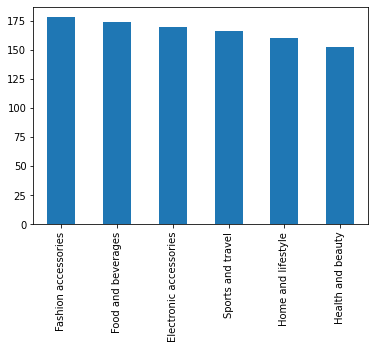

In [237]:
#Gráfico por Produto
df["Linha Produto"].value_counts(ascending=False).plot.bar();

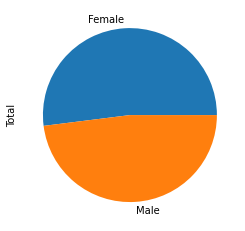

In [238]:
#Gráfico Total de compras por Gênero
df.groupby(df["Gênero"])["Total"].sum().plot.pie();

In [239]:
#Total de Venda por Mês
df.groupby(df["Mes_Venda"])["Quantidade"].sum()

Mes_Venda
1    1965
2    1654
3    1891
Name: Quantidade, dtype: int64

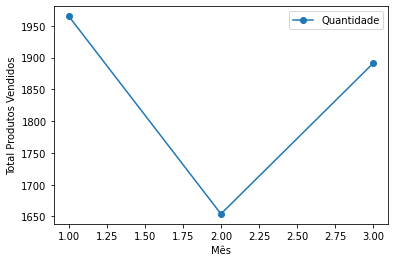

In [240]:
#Gráfico - Total de produtos vendidos por mês
import matplotlib.pyplot as plt
df.groupby(df["Mes_Venda"])["Quantidade"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();

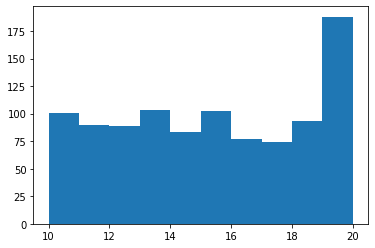

In [241]:
#Visualizaçao do horário de venda
plt.hist(df["Hora_Venda"]);

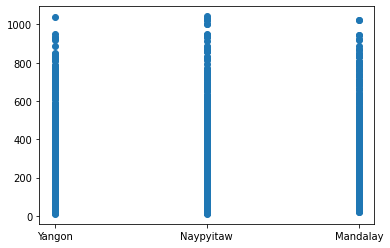

In [242]:
#Visualização do Total de Vendas po Cidade
plt.scatter(x=df["Cidade"], y = df["Total"]);

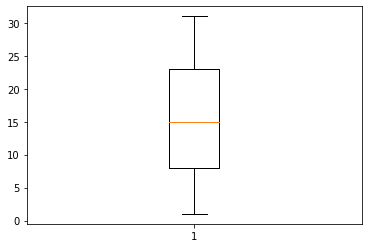

In [243]:
#Visualização do dias de venda
plt.boxplot(df["Dia_Venda"]);

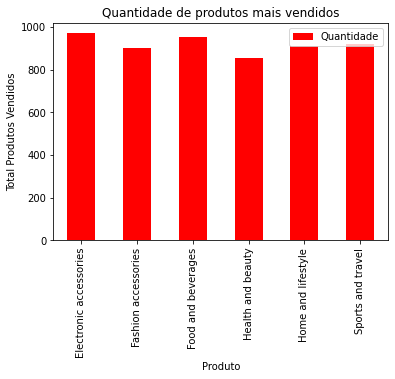

In [244]:
#Salvando em PNG po Produto Vendido
df.groupby(df["Linha Produto"])["Quantidade"].sum().plot.bar(color="red");
plt.title("Quantidade de produtos mais vendidos")
plt.xlabel("Produto")
plt.ylabel("Total Produtos Vendidos");
plt.legend();
plt.savefig("grafico_ProdutoxVendas.png")

In [245]:
#Salvando
df.to_csv("Projeto_Pandas_Carrefour.csv", index=False)